INTRODUCTION TO DT

DECISION TREE

Decision Tree is Supervised Learning technique that can be used for both classification and Regression problems, but mostly it is used in Classification problems. It is a tree structured classifier, where root nodes represents the features of the dataset,Decision node represents the branches on which decision is to be made, and each leaf node represent the outcome

Why use Decision Trees? There are various algorithm in ML, so choosing the best algorithm for the given dataset and problem is the main point to remember while creating ML model. Below are the 2 points which is reason for using DT.

DT works as usually like human thinking ability while making decision, so it is easy to understand The logic behind the DT can be easily understood because it shows trees like structure Advantages of DT:

It is simple to understand and it follows same process which a human follow while making any decision in real life It helps to think about all possible outcomes There is less requirement of Data cleaning compared to other algorithm(EDA process not required) Able to classify Non-linearly separable data Automatically select good features DISADVANTAGES OF DT

The DT contains a lots of layers, which makes it complex sometimes due to large no of data It may have overfitting issue. It is computationally expensive.

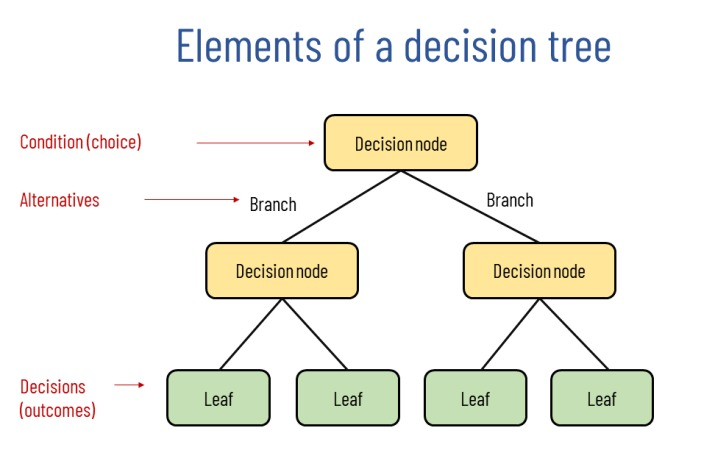

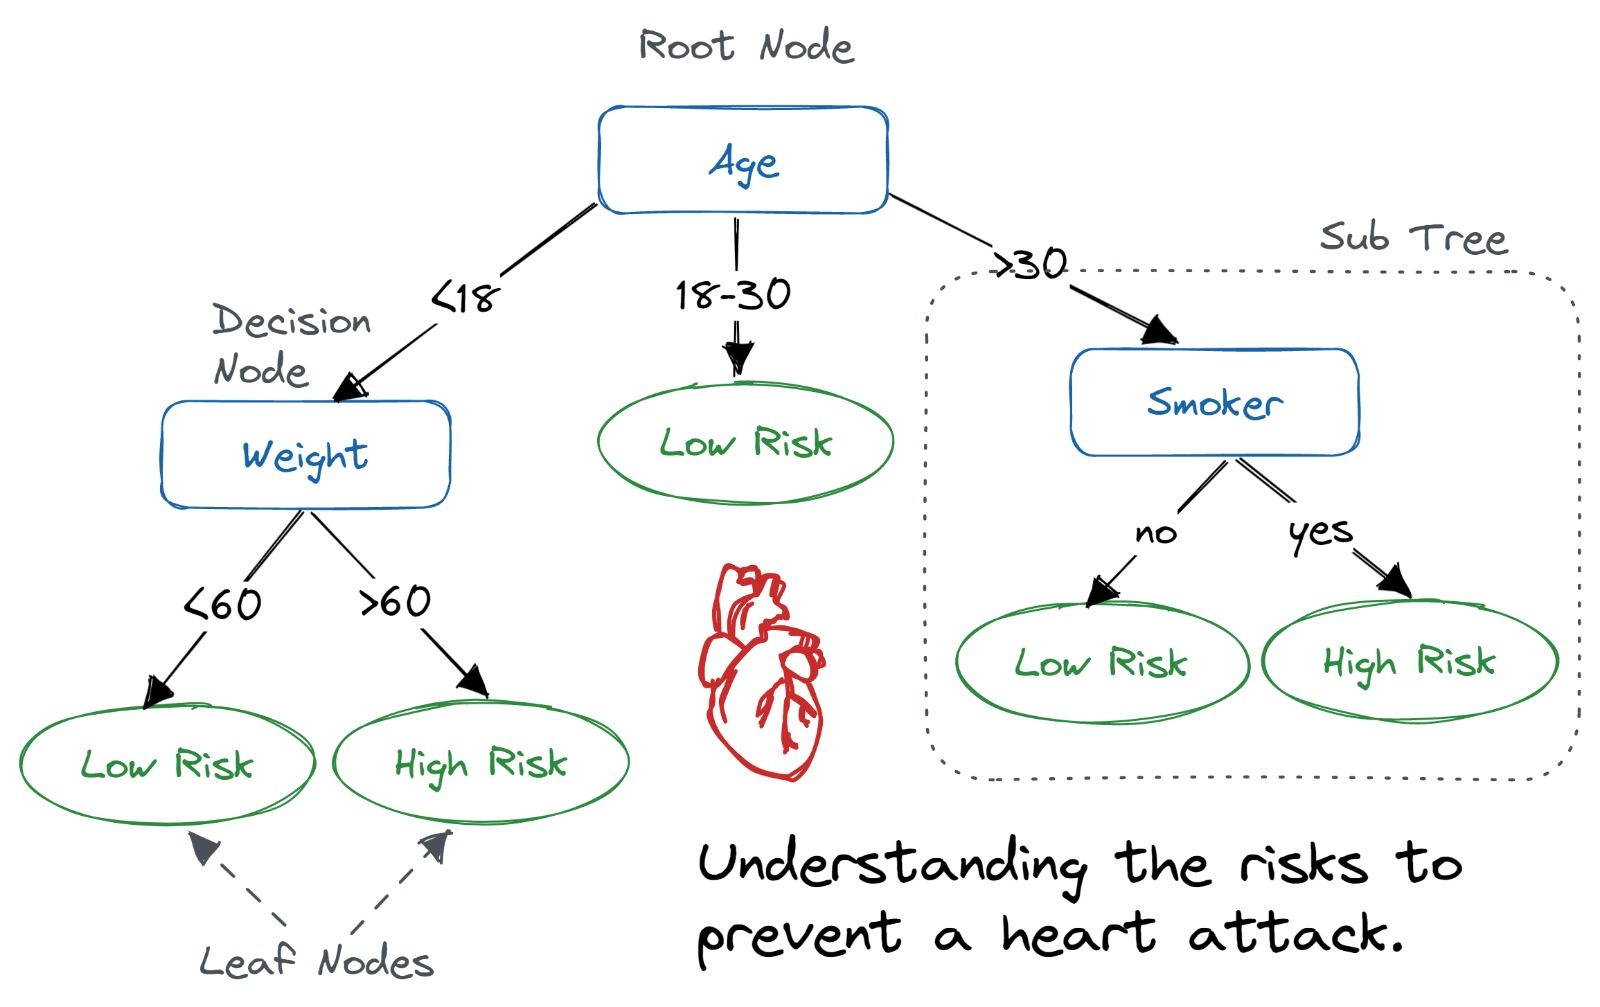

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("wq.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
df["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

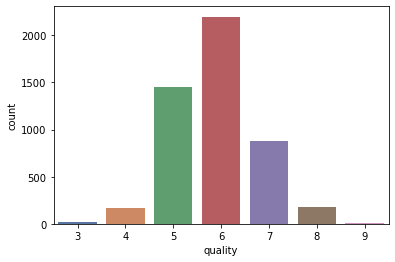

In [5]:
sns.countplot(data=df,x="quality",palette="deep")
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
#Features and target 
X=df.drop("quality",axis=1)
Y=df["quality"]

In [9]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [10]:
Y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

CHECKING THE DATA DISTRIBUTION OF ALL FEATURES 

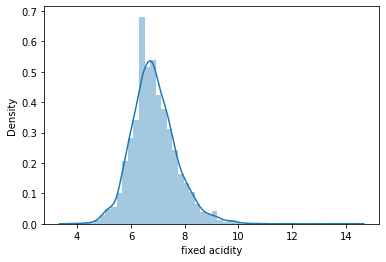

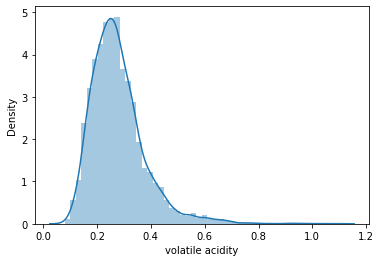

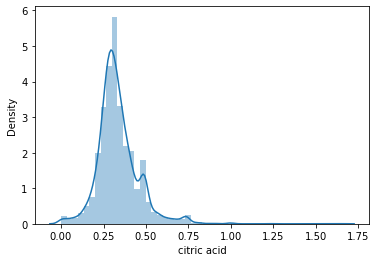

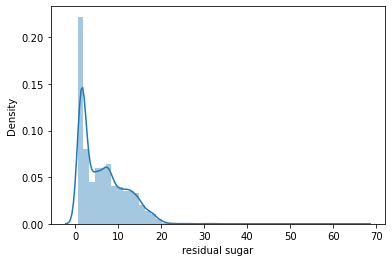

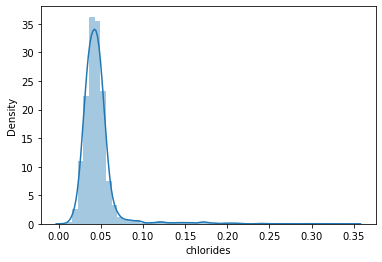

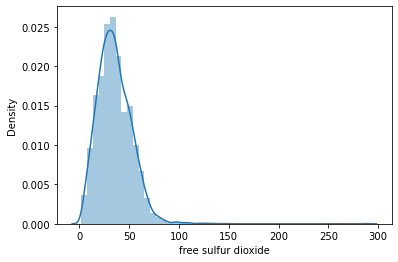

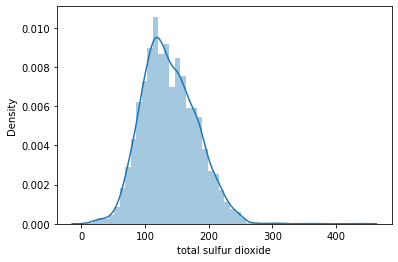

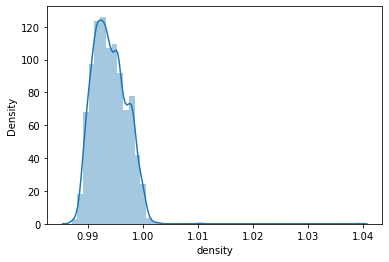

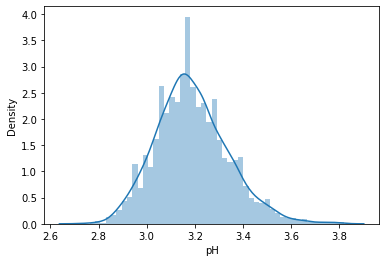

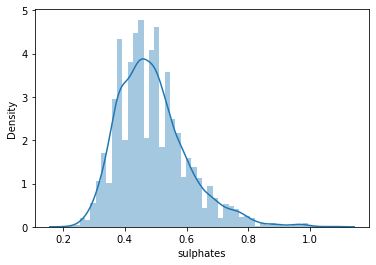

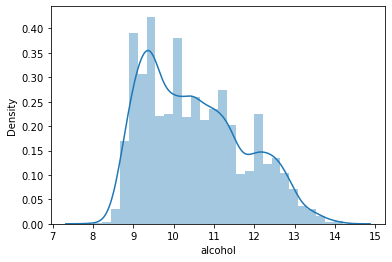

In [12]:
for col in X:
    sns.distplot(X[col])
    plt.show()

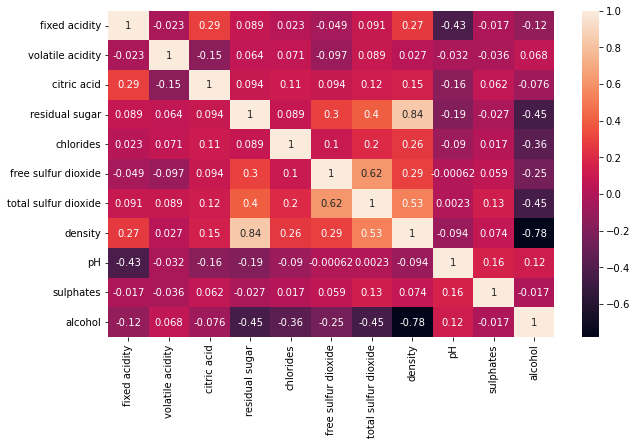

In [13]:
#multicolinearity between all features in x 
#in decision tree heat map is compulsory to understand relations 
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(),annot=True)
plt.show()

checking the outliers of X based on quality

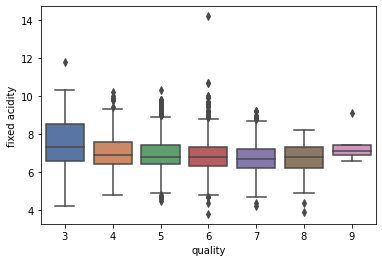

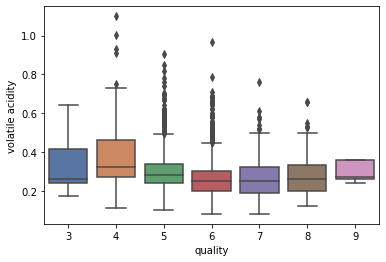

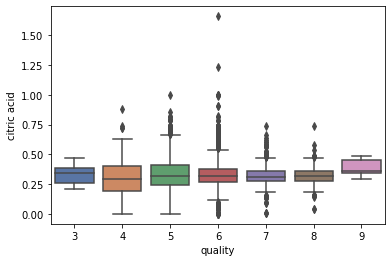

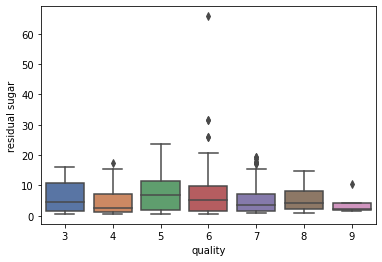

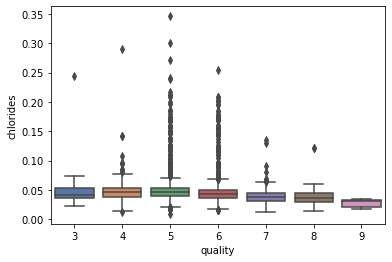

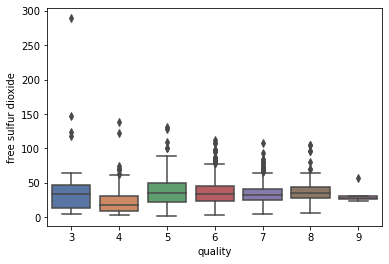

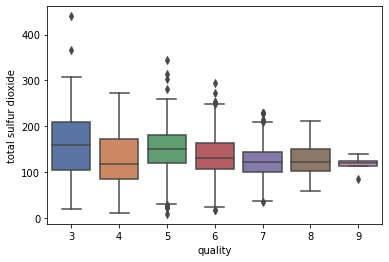

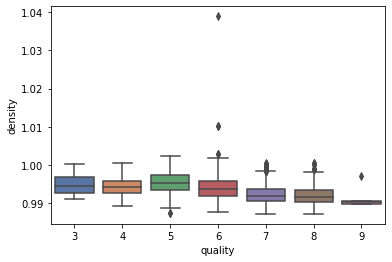

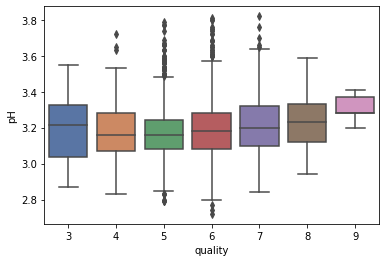

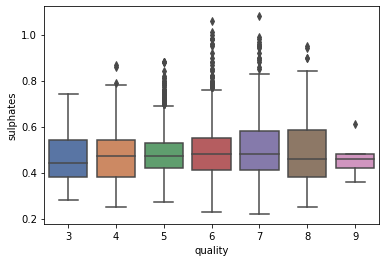

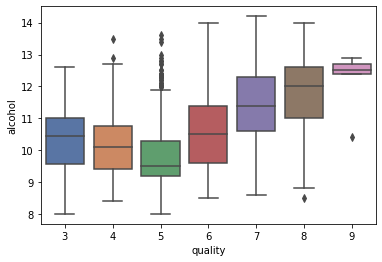

In [14]:
for j in X:
    sns.boxplot(data=df,x="quality",y=j,palette="deep")
    plt.show()

model

 1)gini ====1-p2-q2
 2)entropy= -plogp-qlogq

WHAT IS q?===IT is a failure probability ===1-p ===1-SUccess=Failure====P is success rate

What is p? ===It is success probability

THE ABOVE FORMULA IS USED TO CHECK IMPURITIES IN DATA

In [15]:
#TRAIN TEST SPLIT
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [16]:
dt=DecisionTreeClassifier()  #BY default GINNI  method for checking impuriities or errors in data 

In [17]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [18]:
dt.score(X_train,Y_train) #it shows overfitting scenario because dtscore is 1.0

1.0

In [19]:
Y_pred=dt.predict(X_train)

In [20]:
Y_pred

array([6, 5, 6, ..., 4, 5, 6], dtype=int64)

In [21]:
dt.score(X_test,Y_test)

0.5816326530612245

In [22]:
Y_predtest=dt.predict(X_test)

In [23]:
Y_predtest

array([5, 5, 6, ..., 6, 6, 6], dtype=int64)

In [24]:
#in the above scenario we check training score is 1 which is high and testing score is 0.5 which is low thatmeans it is overfitting scenario 
#because of two many features 

In [25]:
print(classification_report(Y_test,Y_predtest))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.14      0.15      0.15        39
           5       0.64      0.60      0.62       438
           6       0.63      0.64      0.63       655
           7       0.50      0.51      0.51       286
           8       0.35      0.46      0.40        48

    accuracy                           0.58      1470
   macro avg       0.38      0.39      0.38      1470
weighted avg       0.58      0.58      0.58      1470



In [26]:
#we will try the whole model by changing method to entropy

In [27]:
dt1=DecisionTreeClassifier(criterion="entropy")

In [28]:
dt1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
dt1.score(X_train,Y_train)

1.0

In [30]:
Y_pred1=dt1.predict(X_train)

In [31]:
Y_pred1

array([6, 5, 6, ..., 4, 5, 6], dtype=int64)

In [32]:
dt1.score(X_test,Y_test)

0.5857142857142857

In [33]:
Y_predtest1=dt1.predict(X_test)

In [34]:
Y_predtest1

array([5, 5, 7, ..., 6, 6, 6], dtype=int64)

In [35]:
print(classification_report(Y_test,Y_predtest1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.35      0.31      0.33        39
           5       0.63      0.58      0.60       438
           6       0.62      0.64      0.63       655
           7       0.56      0.55      0.56       286
           8       0.27      0.35      0.31        48
           9       0.00      0.00      0.00         0

    accuracy                           0.59      1470
   macro avg       0.35      0.35      0.35      1470
weighted avg       0.59      0.59      0.59      1470



PRUNING TECHNIQUES

In [36]:
#TO CHECK THE DEPTH OF BOTH MODEEL
dt.get_depth()

24

In [37]:
dt1.get_depth()

28

In [38]:
#modifying the depth
dt2=DecisionTreeClassifier(max_depth=12)

In [39]:
dt2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=12)

In [40]:
dt2.score(X_train,Y_train)

0.8147607934655776

In [41]:
Y_pred2=dt2.predict(X_train)

In [42]:
Y_pred2

array([6, 5, 6, ..., 4, 6, 6], dtype=int64)

In [43]:
dt2.score(X_test,Y_test)

0.5687074829931973

In [44]:
Y_predtest2=dt1.predict(X_test)

In [45]:
Y_predtest2

array([5, 5, 7, ..., 6, 6, 6], dtype=int64)

In [46]:
print(classification_report(Y_test,Y_predtest2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.35      0.31      0.33        39
           5       0.63      0.58      0.60       438
           6       0.62      0.64      0.63       655
           7       0.56      0.55      0.56       286
           8       0.27      0.35      0.31        48
           9       0.00      0.00      0.00         0

    accuracy                           0.59      1470
   macro avg       0.35      0.35      0.35      1470
weighted avg       0.59      0.59      0.59      1470



In [47]:
#check the leaves  of the Decision tree

In [48]:
dt2.get_n_leaves()

474

In [49]:
dt.get_n_leaves()

947

In [50]:
dt1.get_n_leaves()

893

In [51]:
#modify the leaves 
dt3=DecisionTreeClassifier(min_samples_leaf=2)

In [52]:
dt3.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_leaf=2)

In [53]:
dt3.score(X_train,Y_train)

0.9151108518086347

In [54]:
Y_pred3=dt3.predict(X_train)

In [55]:
Y_pred3

array([6, 5, 6, ..., 4, 5, 6], dtype=int64)

In [56]:
dt3.score(X_test,Y_test)

0.5619047619047619

In [57]:
Y_predtest3=dt3.predict(X_test)

In [58]:
Y_predtest3

array([4, 5, 6, ..., 6, 6, 6], dtype=int64)

In [59]:
print(classification_report(Y_test,Y_predtest3))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.17      0.28      0.21        39
           5       0.58      0.61      0.60       438
           6       0.62      0.62      0.62       655
           7       0.53      0.45      0.49       286
           8       0.39      0.29      0.33        48

    accuracy                           0.56      1470
   macro avg       0.38      0.38      0.37      1470
weighted avg       0.57      0.56      0.56      1470



In [60]:
Y_train.value_counts()

6    1543
5    1019
7     594
8     127
4     124
3      16
9       5
Name: quality, dtype: int64

RANDOM SAMPLING

Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class.

This bias in the training dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely. This is a problem as it is typically the minority class on which predictions are most important.

One approach to addressing the problem of class imbalance is to randomly resample the training dataset. The two main approaches to randomly resampling an imbalanced dataset are to delete examples from the majority class, called undersampling, and to duplicate examples from the minority class, called oversampling.

There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

Random Oversampling: Randomly duplicate examples in the minority class.
Random Undersampling: Randomly delete examples in the majority class. Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.
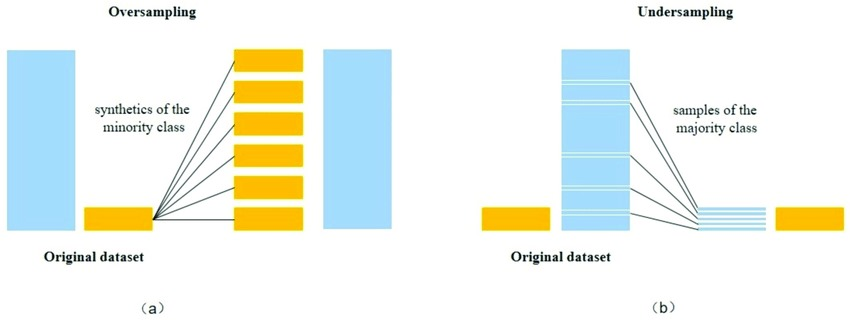

In [61]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imblearn (from versions: none)
ERROR: No matching distribution found for imblearn


In [62]:
from imblearn.over_sampling import RandomOverSampler

In [63]:
rs=RandomOverSampler(random_state=1)  #it should be done only on train

In [64]:
X_Sample,Y_Sample=rs.fit_resample(X_train,Y_train)

In [65]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4554,6.0,0.23,0.34,1.3,0.025,23.0,111.0,0.98961,3.36,0.37,12.7
3401,8.8,0.19,0.30,5.0,0.028,34.0,120.0,0.99242,2.94,0.47,11.2
3330,6.7,0.23,0.33,8.1,0.048,45.0,176.0,0.99472,3.11,0.52,10.1
4462,7.1,0.42,0.20,2.8,0.038,28.0,109.0,0.98968,3.23,0.47,13.4
3171,7.3,0.20,0.39,2.3,0.048,24.0,87.0,0.99044,2.94,0.35,12.0
...,...,...,...,...,...,...,...,...,...,...,...
2895,6.4,0.44,0.26,2.0,0.054,20.0,180.0,0.99520,3.58,0.57,10.0
2763,7.7,0.30,0.34,1.2,0.048,4.0,119.0,0.99084,3.18,0.34,12.1
905,8.4,0.19,0.42,1.6,0.047,9.0,101.0,0.99400,3.06,0.65,11.1
3980,6.1,0.22,0.25,12.1,0.035,54.0,135.0,0.99481,3.21,0.40,10.7


In [67]:
X_Sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.0,0.23,0.34,1.3,0.025,23.0,111.0,0.98961,3.36,0.37,12.7
1,8.8,0.19,0.30,5.0,0.028,34.0,120.0,0.99242,2.94,0.47,11.2
2,6.7,0.23,0.33,8.1,0.048,45.0,176.0,0.99472,3.11,0.52,10.1
3,7.1,0.42,0.20,2.8,0.038,28.0,109.0,0.98968,3.23,0.47,13.4
4,7.3,0.20,0.39,2.3,0.048,24.0,87.0,0.99044,2.94,0.35,12.0
...,...,...,...,...,...,...,...,...,...,...,...
10796,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7
10797,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7
10798,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7
10799,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7


In [68]:
Y_train

4554    6
3401    5
3330    6
4462    6
3171    6
       ..
2895    5
2763    6
905     4
3980    5
235     6
Name: quality, Length: 3428, dtype: int64

In [69]:
Y_Sample

0        6
1        5
2        6
3        6
4        6
        ..
10796    9
10797    9
10798    9
10799    9
10800    9
Name: quality, Length: 10801, dtype: int64

In [70]:
Y_Sample.value_counts()

6    1543
5    1543
4    1543
7    1543
8    1543
9    1543
3    1543
Name: quality, dtype: int64

In [71]:
X_Sample.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol
7.4            0.24              0.36         2.0             0.031      27.0                 139.0                 0.99055  3.28  0.48       12.5       340
6.6            0.36              0.29         1.6             0.021      24.0                 85.0                  0.98965  3.41  0.61       12.4       318
7.1            0.26              0.49         2.2             0.032      31.0                 113.0                 0.99030  3.37  0.42       12.9       309
9.1            0.27              0.45         10.6            0.035      28.0                 124.0                 0.99700  3.20  0.46       10.4       298
6.9            0.36              0.34         4.2             0.018      57.0                 119.0                 0.98980  3.28  0.36       12.7       278
                                                                 

In [72]:
dt4=DecisionTreeClassifier()

In [76]:
dt4.fit(X_Sample,Y_Sample)

DecisionTreeClassifier()

In [77]:
dt4.score(X_Sample,Y_Sample)

1.0

In [78]:
Y_pred4=dt4.predict(X_Sample)

In [79]:
Y_pred4

array([6, 5, 6, ..., 9, 9, 9], dtype=int64)

In [80]:
dt4.score(X_test,Y_test)

0.582312925170068

In [81]:
Y_predtest4=dt4.predict(X_test)

In [82]:
Y_predtest4

array([5, 5, 7, ..., 6, 6, 7], dtype=int64)

In [84]:
print(classification_report(Y_test,Y_predtest4))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.22      0.23      0.23        39
           5       0.63      0.60      0.62       438
           6       0.62      0.63      0.63       655
           7       0.53      0.54      0.53       286
           8       0.31      0.35      0.33        48
           9       0.00      0.00      0.00         0

    accuracy                           0.58      1470
   macro avg       0.33      0.34      0.33      1470
weighted avg       0.59      0.58      0.58      1470



In [83]:
dt4.get_depth()

30

INTRODUCTION TO RANDOM FOREST

What is Random Forest Algorithm? Random Forest Algorithm widespread popularity stems from its user-friendly nature and adaptability, enabling it to tackle both classification and regression problems effectively. The algorithm’s strength lies in its ability to handle complex datasets and mitigate overfitting, making it a valuable tool for various predictive tasks in machine learning.

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables, as in the case of regression, and categorical variables, as in the case of classification. It performs better for classification and regression tasks. In this tutorial, we will understand the working of random forest and implement random forest on a classification task.

Working of Random Forest Algorithm Before understanding the working of the random forest algorithm in machine learning, we must look into the ensemble learning technique. Ensemble simplymeans combining multiple models. Thus a collection of models is used to make predictions rather than an individual model.

Ensemble uses two types of methods: Bagging It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example, Random Forest.

Boosting It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example, ADA BOOST, GRADIENT Boosting & XG Boosting(Extreme Gradient Boosting)
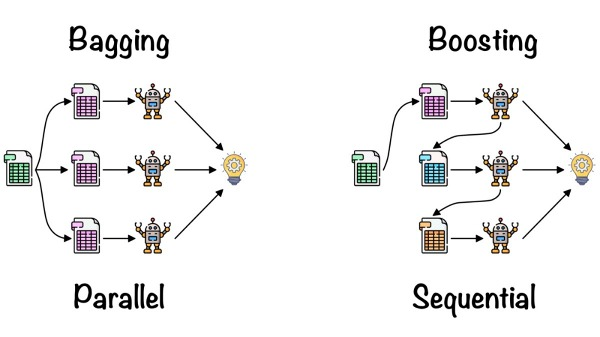

Bagging Bagging, also known as Bootstrap Aggregation, serves as the ensemble technique in the 
Random Forest algorithm. Here are the steps involved in Bagging:

Selection of Subset: Bagging starts by choosing a random sample, or subset, from the entire dataset.
    Bootstrap Sampling: Each model is then created from these samples, called Bootstrap Samples, which are taken from the original data with replacement. This process is known as row sampling. Bootstrapping: The step of row sampling with replacement is referred to as bootstrapping. Independent Model Training: Each model is trained independently on its corresponding Bootstrap Sample. This training process generates results for each model. Majority Voting: The final output is determined by combining the results of all models through majority voting. The most commonly predicted outcome among the models is selected. Aggregation: This step, which involves combining all the results and generating the final output based on majority voting, is known as aggregation

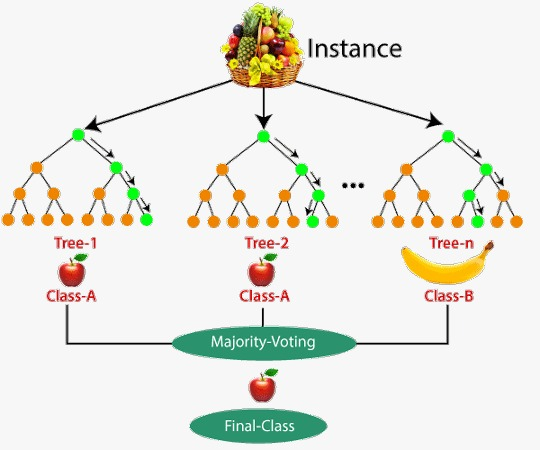

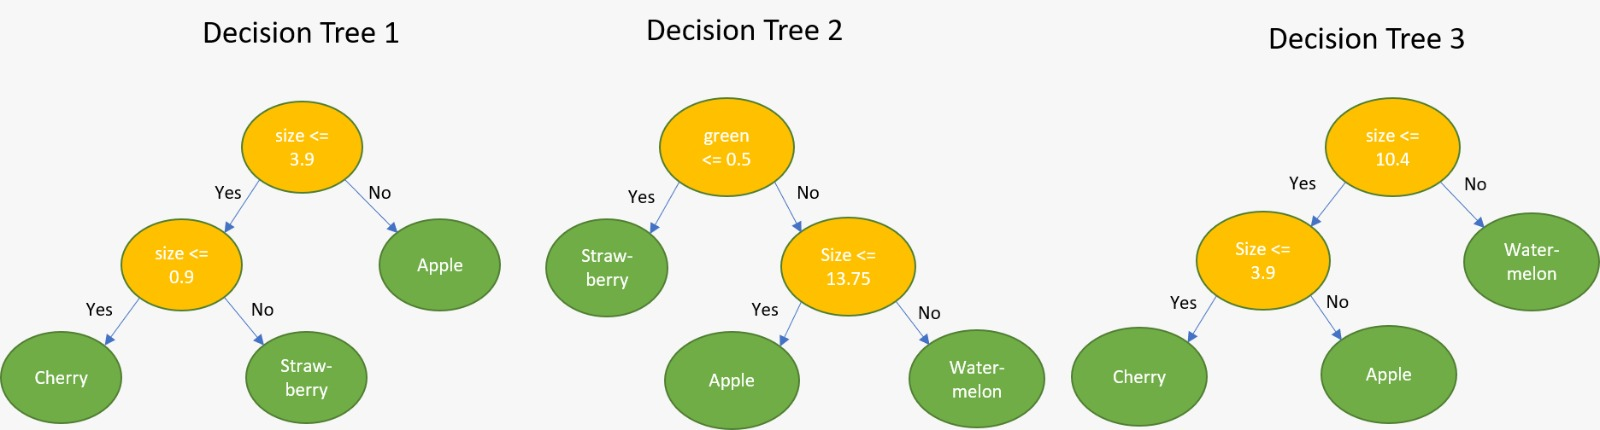

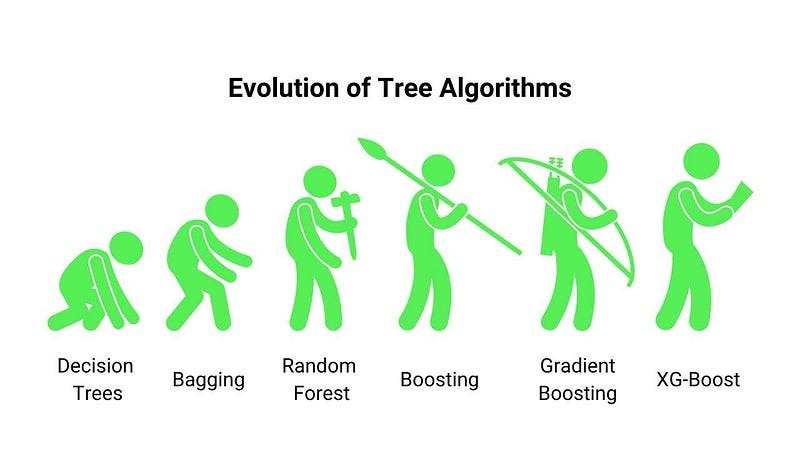

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf=RandomForestClassifier(n_estimators=50,max_depth=15)#n_estimates means no of trees in forest

In [89]:
rf.fit(X_Sample,Y_Sample)

RandomForestClassifier(max_depth=15, n_estimators=50)

In [90]:
rf.score(X_Sample,Y_Sample)

0.9868530691602629

In [91]:
Y_pred5=rf.predict(X_Sample)

In [92]:
Y_pred5

array([6, 5, 6, ..., 9, 9, 9], dtype=int64)

In [93]:
rf.score(X_test,Y_test)

0.6394557823129252

In [94]:
Y_predtest5=rf.predict(X_test)

In [95]:
Y_predtest5

array([5, 5, 7, ..., 6, 6, 6], dtype=int64)

In [96]:
print(classification_report(Y_test,Y_predtest5))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.38      0.23      0.29        39
           5       0.67      0.69      0.68       438
           6       0.66      0.67      0.66       655
           7       0.60      0.61      0.60       286
           8       0.46      0.33      0.39        48

    accuracy                           0.64      1470
   macro avg       0.46      0.42      0.44      1470
weighted avg       0.63      0.64      0.64      1470



 df

In [100]:
#create function for quality column so that we can shrink the qulity from 7 to 2 categories
#3-5===all 0  6-9===all1
def multi(n):
    if n>5:
        return 1
    else:
        return 0

In [101]:
#check whether function is working properly 
multi(4)

0

In [102]:
multi(7)

1

In [103]:
df["quality"]=df["quality"].apply(multi)
#applying the function on quality column

In [104]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [105]:
df["quality"].value_counts()

1    3258
0    1640
Name: quality, dtype: int64

In [106]:
nX=df.drop("quality",axis=1)
nY=df["quality"]

In [107]:
X_trainnew,X_testnew,Y_trainnew,Y_testnew=train_test_split(nX,nY,test_size=0.3,random_state=1)

In [108]:
rf2=RandomForestClassifier(n_estimators=75)

In [109]:
rf2.fit(X_trainnew,Y_trainnew)

RandomForestClassifier(n_estimators=75)

In [110]:
rf2.score(X_trainnew,Y_trainnew)

1.0

In [111]:
Y_pred6=rf.predict(X_trainnew)

In [112]:
Y_pred6

array([6, 5, 6, ..., 4, 5, 6], dtype=int64)

In [113]:
rf2.score(X_testnew,Y_testnew)

0.8272108843537415

In [117]:
Y_predtest6=rf2.predict(X_testnew)

In [118]:
Y_predtest6

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [119]:
print(classification_report(Y_testnew,Y_predtest6))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       481
           1       0.84      0.91      0.88       989

    accuracy                           0.83      1470
   macro avg       0.81      0.78      0.79      1470
weighted avg       0.82      0.83      0.82      1470

